In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""time and wavelength arrays"""
#create time array  
time = np.arange(0, 5000, 1)

#create wavelength array
nm = np.arange(850, 1600, 1)

In [3]:
"""define gaussian parameters"""
#intensity of the gaussian, 
#this is arbitrary but when there're 2 and more gaussians
#in the model, the intensity of each gaussian describes 
#its weight
a1 = 1

#center and FWHM of the gaussian 
x0_1 = 950
sigma_1 = 30

#life-time of the gaussian
tau1 = 10

#create a second gaussian
a2 = 0.3
x0_2 = 1300
sigma_2 = 100
tau2 = 5000

In [4]:
"""Lorentzian fitting function"""
def lorentz(nm, a, x0, sigma):
    """
    Lorentzian function
    """
    lorentz_array=a * sigma / ((nm-x0)**2 + sigma**2)
    return lorentz_array

In [5]:
#generate a Lorentzian model
species_1 = lorentz(nm, a1, x0_1, sigma_1)

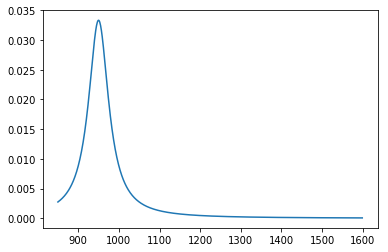

In [6]:
plt.plot(nm,species_1)

In [7]:
#monoexponential
def monoexp(t, tau):
    """
    mono-exponential function
    
    Args:
        t: time array
        tau: life-time
    
    """
    exp_array = np.exp(- (1.0/tau) * t)
    
    return exp_array   

In [8]:
#generate an array of time-coefficients
#describing a mono-exponential decay with a given lifetime 
time_coeff_1 = monoexp(time, tau1)
time_coeff_1

array([1.00000000e+000, 9.04837418e-001, 8.18730753e-001, ...,
       9.61717221e-218, 8.70197727e-218, 7.87387465e-218])

In [9]:
#generate a data matrix that contains a Lorentzian model at each
#time and decays mono-exponentially
def data_matrix(nm_array, time_coeff_array, spectrum):
    """
    generates a two-way data matrix based on a known 
    spectrum and the spectrum's decay
    
    Args:
        nm_array: wavelength array
        time_coeff_array: an array that describes the decay
        spectrum: an array of the spectrum
    
    Returns:
        data_matrix: a matrix that contains the spectrum at each time
    """
    
    data_matrix = np.empty((np.shape(nm_array)[0], np.shape(time_coeff_array)[0]))
    for i in range(np.shape(time_coeff_array)[0]):
        data_matrix[:, i] = time_coeff_array[i] * spectrum
    
    return data_matrix

In [10]:
data_matrix_1 = data_matrix(nm, time_coeff_1, species_1)

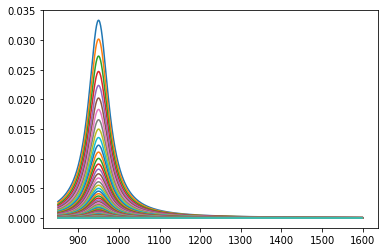

In [11]:
for i in range(5000):
    plt.plot(nm,data_matrix_1[:,i])

In [12]:
#generate a second data matrix that contains a Lorentzian model
#at each time and decays mono-exponentially
species_2 = lorentz(nm, a2, x0_2, sigma_2)
time_coeff_2 = monoexp(time, tau2)
data_matrix_2 = data_matrix(nm, time_coeff_2, species_2)

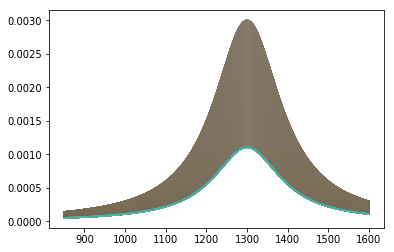

In [13]:
for i in range(5000):
    plt.plot(nm,data_matrix_2[:,i])

In [14]:
#generate a two-Lorentzian mixture model by adding 
#the two Lorentzian above
data_matrix_0 = data_matrix_1 + data_matrix_2

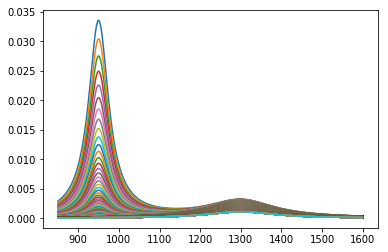

In [15]:
for i in range(5000):
    plt.plot(nm,data_matrix_0[:,i])

In [16]:
def spectral_shift(start_nm, end_nm, time):
    """
    generates a linear spectral shift
    
    Args:
        start_nm: the starting peak position
        end_nm: the ending peak position
        time: an array of time
    
    Returns:
        an array of peak position within the given time
    
    """
    
    #calculate the step of peak shift at each time interval 
    #the peak shift is linear
    step = float((end_nm - start_nm)) / (len(time))
    
    x0 = np.arange(start_nm, end_nm, step)

    return x0

In [17]:
#generate an array of peak positions that shifts from 1200 to 1300
#within a time array
x0_1_shift = spectral_shift(1200, 1300, time)

In [18]:
def Lorentzian_shift(nm, a, x0_shiftarray, sigma):
    """
    generates a matrix that contains a gaussian model that spectrally shifts
    
    Args:
        nm: wavelength array
        a: intensity of the Lorentzian
        x0_shiftarray: an array of peak positions
        sigma: Lorentzian FWHM
    
    Returns
        a matrix that contains Lorentzian function that contains spectral shift
    
    """
    
    Lorentzian_matrix = np.empty((len(nm), len(x0_shiftarray)))
    for i in range(len(x0_shiftarray)):
        Lorentzian_matrix[:, i]=a * sigma / ((nm-x0_shiftarray[i])**2 + sigma**2)
    return Lorentzian_matrix

In [19]:
#generates a matrix that contains a Lorentzian at each time with a shift
#in peak position
species_1_matrix = Lorentzian_shift(nm, a1, x0_1_shift, sigma_1)

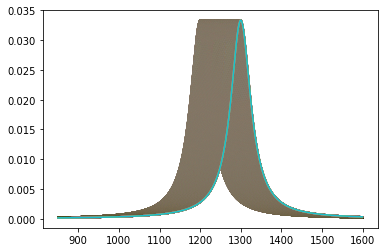

In [20]:
for i in range(5000):
    plt.plot(nm,species_1_matrix[:,i])

In [21]:
def data_matrix_spectralshift(nm, time_coeff_array, spectrum_matrix):
    """
    generates a matrix that contains a Lorentzian model with a known decay
    
    Args:
        nm_array: wavelength array
        time_coeff_array: array of time coefficients that 
            describes the kinetics
        spectrum_matrix: a matrix that contains Lorentzian function at each time
    
    Returns:
        a matrix that contains Lorentzian function that evolves in time
        
    """
    data_matrix = np.empty((np.shape(nm)[0], np.shape(time_coeff_array)[0]))
    for i in range(np.shape(time_coeff_array)[0]):
        data_matrix[:, i] = time_coeff_array[i] * spectrum_matrix[:, i]
    
    return data_matrix

In [22]:
#generates a matrix that contains a Lorentzian at each time with a peak
#shift and monoexponential decay
data_1_matrix_shift = data_matrix_spectralshift(nm, time_coeff_1, species_1_matrix)

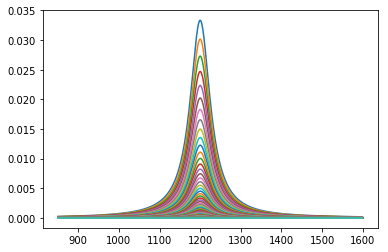

In [23]:
for i in range(5000):
    plt.plot(nm,data_1_matrix_shift[:,i])

In [24]:
def find_nearest(array,value):
    """
    find the nearest value to a given value
    Returns:
        the index of the nearest value in the array
    """
    idx = (np.abs(array-value)).argmin()
    return idx

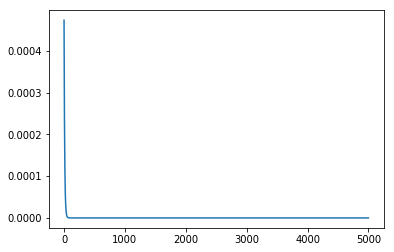

In [25]:
#plot the peak shift over time
plt.figure()
plt.plot(time, data_1_matrix_shift[find_nearest(nm, 950), :])

In [29]:
#generate a two-Lorentzian mixture with spectral evolution
#by adding one Lorentzian that contains spectral shift and one without
#spetral shift
data_matrix = data_1_matrix_shift + data_matrix_2

In [30]:
def twodcontourplot(tadata_nm, tadata_timedelay, tadata_z_corr):
    """
    make contour plot
    
    Args:
        tadata_nm: wavelength array
        tadata_timedelay: time delay array
        tadata_z_corr: matrix of z values
        
    """
    nm, timedelay = np.linspace(tadata_nm.min(), tadata_nm.max(), 100), np.linspace(tadata_timedelay.min(), tadata_timedelay.max(), 100)    
    timedelayi, nmi = np.meshgrid(tadata_timedelay, tadata_nm)

    #find the maximum and minimum
    #these are used for color bar
    z_min = np.amin(np.amin(tadata_z_corr, axis = 1))
    z_max = np.amax(np.amax(tadata_z_corr, axis = 1))

    return [nmi, timedelayi, z_min, z_max]

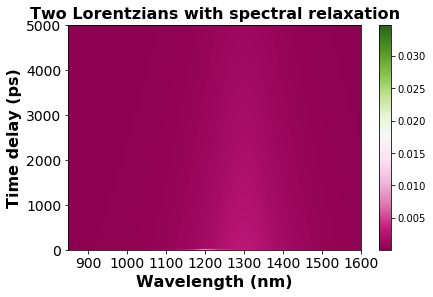

In [31]:
"""make 2d contour plot"""

plt.figure()
#plt.xlim(450,800)
plt.title('Two Lorentzians with spectral relaxation', fontsize = 16, fontweight = 'bold')
#plt.ylim(0,50)
plt.xlabel('Wavelength (nm)', fontsize = 16, fontweight = 'bold')
plt.ylabel('Time delay (ps)', fontsize = 16, fontweight = 'bold')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
nmi_9, timedelayi_9, z_min_9, z_max_9 = twodcontourplot(nm, time, data_matrix)
plt.pcolormesh(nmi_9, timedelayi_9, data_matrix, cmap = 'PiYG', vmin=z_min_9, vmax=z_max_9)
plt.colorbar()
plt.tight_layout(pad=0.25, h_pad=None, w_pad=None, rect=None)


In [32]:
"""output data"""
#1st columns: wavelength
#1st rows: time
output = np.empty((np.shape(data_matrix)[0]+1, np.shape(data_matrix)[1]+1))
output[1:, 1:] = data_matrix
output[0, 1:] = time
output[1:, 0] = nm
outfile = np.savetxt('twoLorentzian_spectralshfit.txt', output, fmt='%.3e', delimiter='\t')